In [83]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [84]:
df=pd.read_csv(r'crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [85]:
df=df.drop('Unnamed: 0',axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [87]:
df=pd.DataFrame(normalize(df),columns=df.columns)
df

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


# Hierarchial Clustering

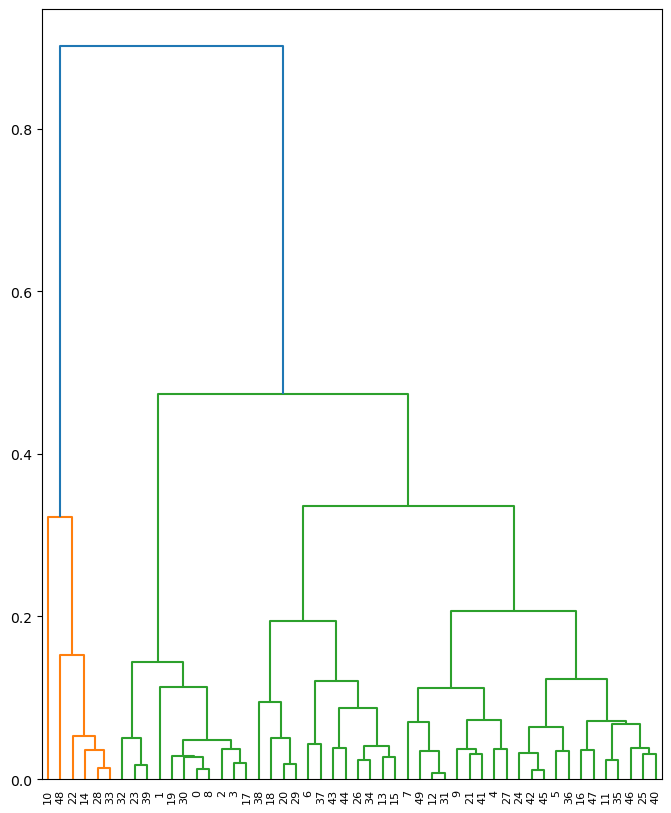

In [88]:
#Dendogram
plt.figure(figsize=(8,10))
dendo=sch.dendrogram(sch.linkage(df,'complete'))

In [89]:
#Create Clusters
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [90]:
y=hc.fit_predict(df)
y

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [91]:
Clusters=pd.DataFrame(y,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
5,0
6,0
7,0
8,2
9,0


In [92]:
Clusters.value_counts()

Clusters
0           33
2           11
1            6
dtype: int64

In [93]:
df1=df.copy()
df1['clusters_complete']=hc.labels_
df1

,Murder,Assault,UrbanPop,Rape,clusters_complete
0,0.054031,0.966016,0.237411,0.086778,2
1,0.036872,0.969739,0.176987,0.164081,2
2,0.026439,0.959624,0.261122,0.101185,2
3,0.044528,0.961392,0.252998,0.098669,2
4,0.030657,0.940134,0.309972,0.138295,0
5,0.035594,0.919142,0.351437,0.174367,0
6,0.024486,0.816202,0.571341,0.082362,0
7,0.023674,0.954965,0.288897,0.063397,0
8,0.044478,0.967547,0.231056,0.092134,2
9,0.078534,0.952332,0.270805,0.116446,0


In [94]:
df

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


# K Means Clustering

In [95]:
# Inertia
a=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    a.append(kmeans.inertia_)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

Text(0.5, 1.0, 'Elbow Graph')

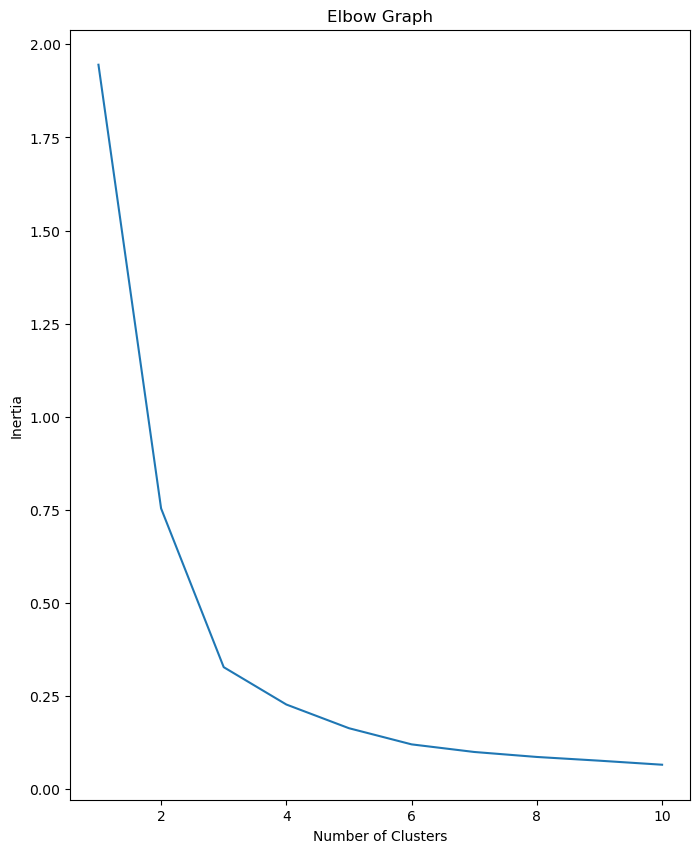

In [96]:
# Elbow Graph
plt.figure(figsize=(8,10))
plt.plot(range(1,11),a)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')

In [97]:
kmeans=KMeans(n_clusters=4)
clusterK=kmeans.fit(df)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
clusterK.labels_

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       3, 0, 0, 0, 1, 0])

In [99]:
df1['cluster_kmeans']=clusterK.labels_
df1

,Murder,Assault,UrbanPop,Rape,clusters_complete,cluster_kmeans
0,0.054031,0.966016,0.237411,0.086778,2,2
1,0.036872,0.969739,0.176987,0.164081,2,2
2,0.026439,0.959624,0.261122,0.101185,2,2
3,0.044528,0.961392,0.252998,0.098669,2,2
4,0.030657,0.940134,0.309972,0.138295,0,2
5,0.035594,0.919142,0.351437,0.174367,0,0
6,0.024486,0.816202,0.571341,0.082362,0,3
7,0.023674,0.954965,0.288897,0.063397,0,2
8,0.044478,0.967547,0.231056,0.092134,2,2
9,0.078534,0.952332,0.270805,0.116446,0,2


In [100]:
clusterK.cluster_centers_

array([[0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.03689098, 0.84108145, 0.52207436, 0.12738443]])

In [101]:
silhouette_score(df,clusterK.labels_)

0.46582251781897477

# DBSCAN

In [110]:
dbscan=DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(df)

DBSCAN(eps=0.2)

In [108]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [111]:
df1['cluster_dbscan']=dbscan.labels_
df1

,Murder,Assault,UrbanPop,Rape,clusters_complete,cluster_kmeans,cluster_dbscan
0,0.054031,0.966016,0.237411,0.086778,2,2,0
1,0.036872,0.969739,0.176987,0.164081,2,2,0
2,0.026439,0.959624,0.261122,0.101185,2,2,0
3,0.044528,0.961392,0.252998,0.098669,2,2,0
4,0.030657,0.940134,0.309972,0.138295,0,2,0
5,0.035594,0.919142,0.351437,0.174367,0,0,0
6,0.024486,0.816202,0.571341,0.082362,0,3,0
7,0.023674,0.954965,0.288897,0.063397,0,2,0
8,0.044478,0.967547,0.231056,0.092134,2,2,0
9,0.078534,0.952332,0.270805,0.116446,0,2,0
